# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_df["Mouse ID", "Timepoint"].value_counts()
duplicates = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume_group = clean_combined_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = tumor_volume_group["Tumor Volume (mm3)"].mean()
median_volume = tumor_volume_group["Tumor Volume (mm3)"].median()
var_volume = tumor_volume_group["Tumor Volume (mm3)"].var()
sd_volume = tumor_volume_group["Tumor Volume (mm3)"].std()
sderr_volume = tumor_volume_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_volume = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                              "Median Tumor Volume": median_volume,
                              "Tumor Volume Variance": var_volume,
                              "Tumor Volume Std. Dev.": sd_volume,
                              "Tumor Volume Std. Err.": sderr_volume})
summary_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = tumor_volume_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

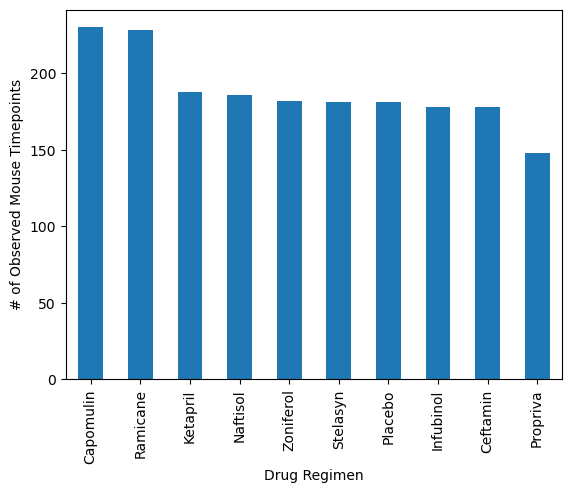

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_combined_df["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

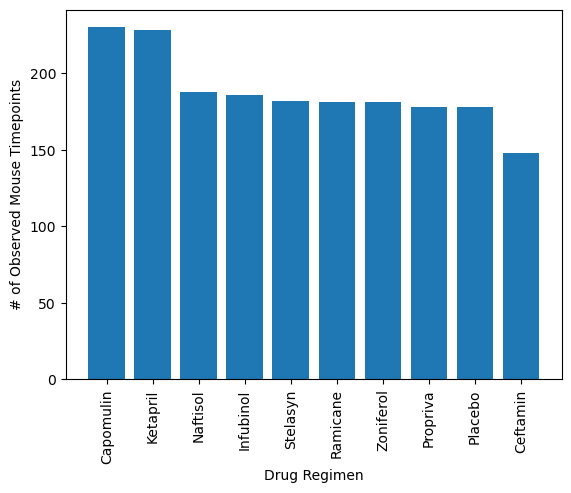

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts

x_axis = clean_combined_df["Drug Regimen"].unique()

plt.bar(x_axis, drug_regimen_counts)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

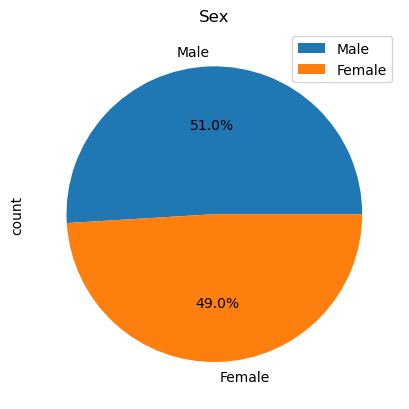

In [11]:
# Determine and created DataFrame for count of Sex
sex_count = clean_combined_df["Sex"].value_counts()
sex_count_df = pd.DataFrame(sex_count)
sex_count_df

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count_df.plot(kind="pie", autopct="%1.1f%%",subplots=True)
plt.title("Sex")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

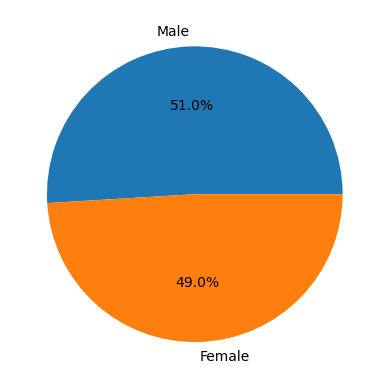

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct="%1.1f%%")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filters_drug = clean_combined_df.loc[clean_combined_df["Drug Regimen"].isin(drug_regimens)]
filters_drug
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filters_drug.groupby("Mouse ID")["Timepoint"].max()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_combined_df = pd.merge(last_timepoint, clean_combined_df, on=["Mouse ID", "Timepoint"], how="inner")
max_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volume = max_combined_df.loc[max_combined_df["Drug Regimen"].isin([drug]), "Tumor Volume (mm3)"]
    
    # add subset 
    drug_volume_data.append(drug_volume)
    
    # Determine outliers using upper and lower bounds
    quartile = drug_volume.quantile([0.25, 0.5, 0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    
    outliers = drug_volume[(drug_volume < lower_bound) | (drug_volume > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Simon\AppData\Local\Temp\ipykernel_19276\3558605129.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_regimens)


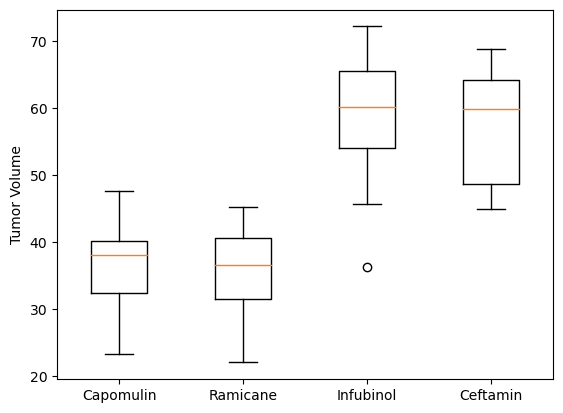

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume')
ax1.set_xticklabels(drug_regimens)
ax1.boxplot(drug_volume_data)
plt.show()

## Line and Scatter Plots

In [18]:
# Create DataFrame for a single mouse treated with Capomulin
l509_capomulin_df = clean_combined_df.loc[(clean_combined_df["Mouse ID"] == "l509") & (clean_combined_df["Drug Regimen"] == "Capomulin")]
l509_capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


In [19]:
# Determine X and y values for graph
x_values = l509_capomulin_df["Timepoint"]
y_values = l509_capomulin_df["Tumor Volume (mm3)"]

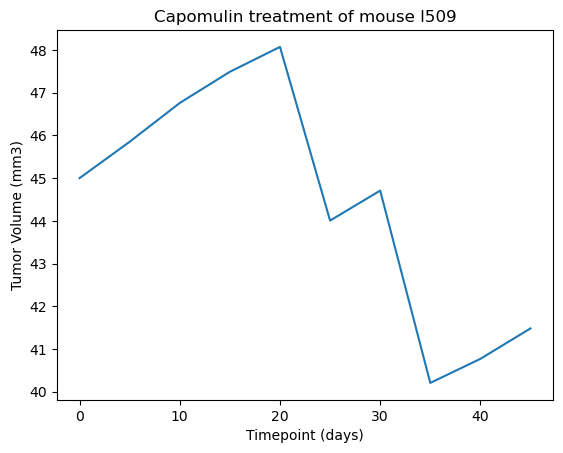

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(x_values, y_values)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [36]:
# Create DataFrame for just Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [37]:
# Calculate Average Tumor Volume per mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Calculate Weight per mouse
average_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
average_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

In [24]:
# Create DataFrame for Average Tumor Volume and Weight per mouse
capomulin_weight_volume = {"Tumor Volume (mm3)" : average_tumor_volume,
                                      "Weight (g)" : average_weight}
capomulin_weight_volume = pd.DataFrame(capomulin_weight_volume)
capomulin_weight_volume

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


In [25]:
# Determine X and Y values for graph
weight = capomulin_weight_volume["Weight (g)"]
tumor_volume = capomulin_weight_volume["Tumor Volume (mm3)"]

<function matplotlib.pyplot.show(close=None, block=None)>

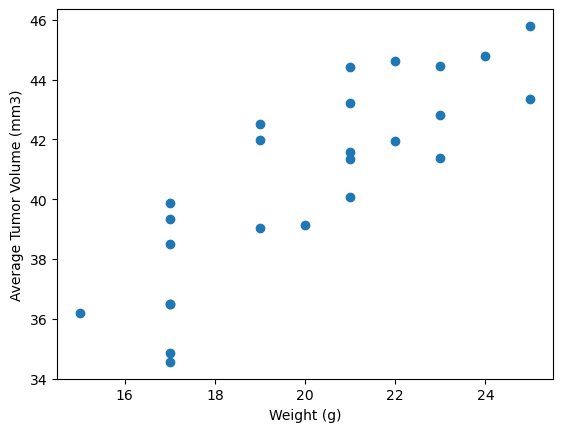

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

In [27]:
# Determine X and Y values for graph
weight = capomulin_weight_volume["Weight (g)"]
tumor_volume = capomulin_weight_volume["Tumor Volume (mm3)"]

In [32]:
# Linear equation creation
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


The correlation between mouse weight and the average tumor volume is 0.84


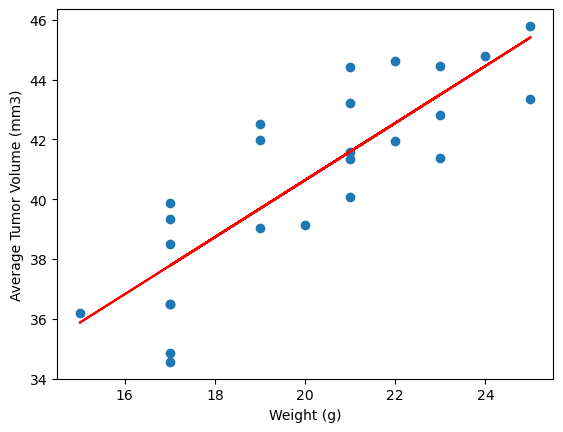

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(weight, tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()